Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



Where can we place an additional ambulance strategic location?

In [ ]:
import os
import pandas as pd
import geopandas as gpd
# folium, matplotlib, and mapclassify are needed to run hospital_filter.explore but is unable to see a module named mapclassify
import folium
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/exercise 7 curless')

In [ ]:
# downloaded data from 'https://hifld-geoplatform.opendata.arcgis.com/datasets/75079bdea94743bcaca7b6e833692639/explore'
hospital = gpd.read_file('Hospitals.geojson')
pd.set_option('display.max_columns', None)
hospital.head()

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,1,0001336420,ANDALUSIA HEALTH,"849 SOUTH THREE NOTCH STREET, PO BOX 760",ANDALUSIA,AL,36420,NOT AVAILABLE,(334) 222-8466,GENERAL ACUTE CARE,OPEN,88,COVINGTON,01039,USA,31.295795,-86.494549,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://dph1.adph.state.al.us/FacilitiesDirect...,2021-10-19 00:00:00+00:00,IMAGERY/OTHER,2014-02-10 00:00:00+00:00,http://www.andalusiaregionalhospital.com,H2001,NOT AVAILABLE,01,PROPRIETARY,-999,88,LEVEL III,Y,POINT (-86.49455 31.29580)
1,2,0001535611,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL,35611,NOT AVAILABLE,(256) 262-6468,GENERAL ACUTE CARE,OPEN,71,LIMESTONE,01083,USA,34.804164,-86.978407,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://dph1.adph.state.al.us/FacilitiesDirect...,2021-10-19 00:00:00+00:00,IMAGERY/OTHER,2013-10-02 00:00:00+00:00,http://www.athenslimestonehospital.com,H4201,NOT AVAILABLE,01,PROPRIETARY,-999,71,LEVEL III,N,POINT (-86.97841 34.80416)
2,3,0000136502,ATMORE COMMUNITY HOSPITAL,401 MEDICAL PARK DR,ATMORE,AL,36502,NOT AVAILABLE,(251) 368-2500,GENERAL ACUTE CARE,OPEN,51,ESCAMBIA,01053,USA,31.017024,-87.478799,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://dph1.adph.state.al.us/FacilitiesDirect...,2021-10-19 00:00:00+00:00,IMAGERY/OTHER,2014-02-10 00:00:00+00:00,http://www.ebaptisthealthcare.org/atmorecommun...,H2704,NOT AVAILABLE,01,NON-PROFIT,-999,51,LEVEL III,Y,POINT (-87.47880 31.01702)
3,4,0000236124,BAPTIST MEDICAL CENTER EAST,"400 TAYLOR ROAD, PO BOX 241267",MONTGOMERY,AL,36117,1267,(334) 747-4410,GENERAL ACUTE CARE,OPEN,150,MONTGOMERY,01101,USA,32.376399,-86.174930,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://dph1.adph.state.al.us/FacilitiesDirect...,2021-10-19 00:00:00+00:00,IMAGERY/OTHER,2013-09-03 00:00:00+00:00,http://www.baptistfirst.org,H5107,NOT AVAILABLE,01,GOVERNMENT - DISTRICT/AUTHORITY,-999,150,NOT AVAILABLE,Y,POINT (-86.17493 32.37640)
4,5,0001736111,BAPTIST MEDICAL CENTER SOUTH,"2105 EAST SOUTH BOULEVARD, PO BOX 11010",MONTGOMERY,AL,36111,0010,(334) 286-2100,GENERAL ACUTE CARE,OPEN,432,MONTGOMERY,01101,USA,32.328154,-86.277549,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://dph1.adph.state.al.us/FacilitiesDirect...,2021-10-19 00:00:00+00:00,IMAGERY/OTHER,2014-03-12 00:00:00+00:00,http://www.baptistfirst.org,H5102,NOT AVAILABLE,01,GOVERNMENT - DISTRICT/AUTHORITY,-999,432,LEVEL II,Y,POINT (-86.27755 32.32815)


In [ ]:
hospital_filter = hospital[(hospital['STATE'] == 'MD') & (hospital['COUNTY'] == 'MONTGOMERY') & (hospital['CITY'] == 'ROCKVILLE')]
hospital_filter.head()

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
2923,3014,0103520850,ADVENTIST HEALTHCARE REHABILITATION AT ROCKVILLE,9909 MEDICAL CENTER DRIVE,ROCKVILLE,MD,20850,NOT AVAILABLE,(240) 864-6005,REHABILITATION,OPEN,87,MONTGOMERY,24031,USA,39.098594,-77.200677,622310,"REHABILITATION HOSPITALS (EXCEPT ALCOHOLISM, D...",https://health.maryland.gov/ohcq/docs/provider...,2021-01-11 00:00:00+00:00,IMAGERY/OTHER,2015-02-27 00:00:00+00:00,http://www.adventisthealthcare.com/,15077,NOT AVAILABLE,24,NON-PROFIT,-999,87,NOT AVAILABLE,N,POINT (-77.20068 39.09859)
2925,3016,0103020850,ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER,9901 MEDICAL CENTER DRIVE,ROCKVILLE,MD,20850,NOT AVAILABLE,(240) 826-6527,GENERAL ACUTE CARE,OPEN,329,MONTGOMERY,24031,USA,39.097844,-77.197904,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,https://health.maryland.gov/ohcq/docs/provider...,2021-01-11 00:00:00+00:00,IMAGERY/OTHER,2015-05-12 00:00:00+00:00,http://www.adventisthealthcare.com,15023,NOT AVAILABLE,24,NON-PROFIT,-999,329,NOT AVAILABLE,Y,POINT (-77.19790 39.09784)
7381,7480,0001520850,ADVENTIST HEALTHCARE BEHAVIORAL HEALTH AND WEL...,14901 BROSCHART ROAD,ROCKVILLE,MD,20850,NOT AVAILABLE,(301) 838-4959,PSYCHIATRIC,OPEN,107,MONTGOMERY,24031,USA,39.099863,-77.198958,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://dhmh.maryland.gov/ohcq/pages/licensee-d...,2020-08-08 00:00:00+00:00,IMAGERY/OTHER,2022-04-07 00:00:00+00:00,http://www.adventistbehavioralhealth.com,NOT AVAILABLE,ADVENTIST BEHAVIORAL HEALTH ROCKVILLE,24,NON-PROFIT,-999,107,NOT AVAILABLE,Y,POINT (-77.19896 39.09986)


<Axes: >

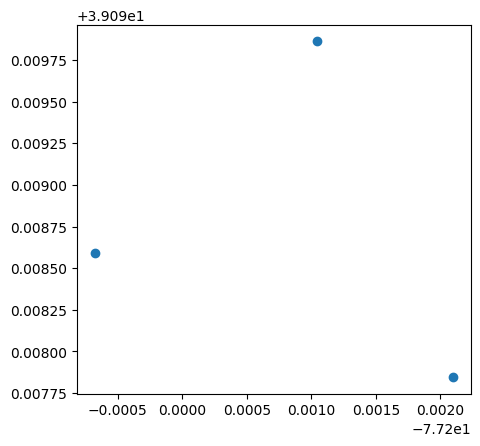

In [ ]:
# attempting to layer a map onto the plot using hospital_filter.explore but colab cannot find the required module mapclassify
# attempting to find the centroid to see where an ambulance stategic location could be placed (equal distance to all three hospitals).
hospital_filter.plot()

In [ ]:
hospital_filter.centroid()

<ipython-input-48-f53ce59f47f6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hospital_filter.centroid()


TypeError: 'GeoSeries' object is not callable